In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,MaxPooling2D,Conv2D,Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

In [45]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [46]:
X_train.shape

(60000, 28, 28)

In [47]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [48]:
X_train,X_test = X_train/255.0,X_test/255.0

In [49]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [50]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',kernel_regularizer=l2(0.001),input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64,(3,3),activation='relu',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    Conv2D(128,(3,3),activation='relu',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),

    Flatten(),
    Dense(128,activation='relu',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(10,activation='softmax')

])

In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)         

In [52]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [53]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [54]:
history = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=early_stopping)

Epoch 1/50
1875/1875 [==============================] - 41s 21ms/step - loss: 0.9092 - accuracy: 0.7905 - val_loss: 0.6510 - val_accuracy: 0.8503
Epoch 2/50
1875/1875 [==============================] - 50s 27ms/step - loss: 0.6350 - accuracy: 0.8525 - val_loss: 0.5357 - val_accuracy: 0.8807
Epoch 3/50
1875/1875 [==============================] - 38s 20ms/step - loss: 0.5872 - accuracy: 0.8634 - val_loss: 0.5317 - val_accuracy: 0.8844
Epoch 4/50
1875/1875 [==============================] - 38s 20ms/step - loss: 0.5866 - accuracy: 0.8658 - val_loss: 0.5203 - val_accuracy: 0.8826
Epoch 5/50
1875/1875 [==============================] - 37s 20ms/step - loss: 0.5761 - accuracy: 0.8687 - val_loss: 0.5205 - val_accuracy: 0.8834
Epoch 6/50
1875/1875 [==============================] - 35s 18ms/step - loss: 0.5729 - accuracy: 0.8691 - val_loss: 0.5358 - val_accuracy: 0.8841
Epoch 7/50
1875/1875 [==============================] - 41s 22ms/step - loss: 0.5689 - accuracy: 0.8730 - val_loss: 0.5301 -

In [67]:
test_loss , test_acc = model.evaluate(X_test,y_test,verbose=2)
print(f"Test Accuracy:{test_acc:4f}")

313/313 - 2s - loss: 0.5203 - accuracy: 0.8826
Test Accuracy:0.882600


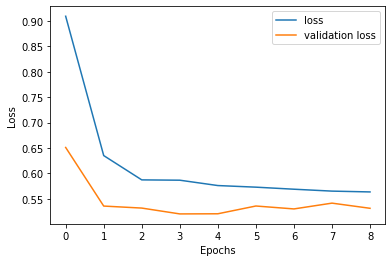

In [68]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

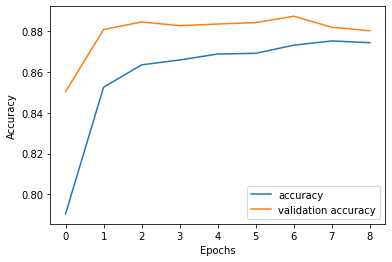

In [69]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Prediction

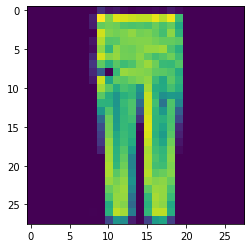

In [73]:
plt.imshow(X_test[200])

In [74]:
# Define class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


single_img = X_test[200].reshape(28,28,1)
single_img = np.expand_dims(single_img,axis=0)

single_predcit = model.predict(single_img)
predicted_class = np.argmax(single_predcit)

print(class_names[predicted_class])
print(predicted_class)


Trouser
1
